In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 8.0
import pandas as pd
import numpy as np
import seaborn as sns

from math import log

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import load_iris

In [2]:
gender_df = pd.read_csv("data/gender_submission.csv")
test_df1 = pd.read_csv("data/test.csv")
train_df = pd.read_csv("data/train.csv")

# Edit datasets
test_df2 = pd.read_csv("data/test.csv")
train_df2 = pd.read_csv("data/train.csv")

In [3]:
df1 = test_df1.count()
df1 = pd.DataFrame(df1).reset_index().rename(columns={"index":"fields", 0:"fields_value_count"})
df1

,fields,fields_value_count
0,PassengerId,418
1,Pclass,418
2,Name,418
3,Sex,418
4,Age,332
5,SibSp,418
6,Parch,418
7,Ticket,418
8,Fare,417
9,Cabin,91


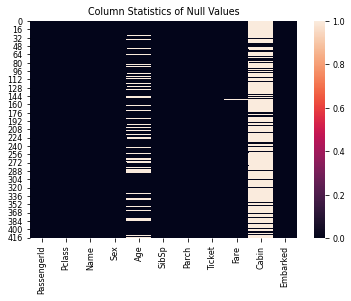

In [4]:
sns.heatmap(test_df1.isnull())
plt.title("Column Statistics of Null Values")
plt.savefig("resource/images/na_test_df_heatmap.png", bbox_inches='tight', pad_inches=0.5)

In [5]:
# Droping columns
test_df3 = test_df1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
train_df2 = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# Because Fare only account for one with Null, we filtering for all row not null. Easy peasy
# test_df3 = test_df3[test_df3['Fare'].notna()]
# train_df2 = train_df2[train_df2['Embarked'].notna()]

# Replaced null Age value with random number between the youngest and oldest age
test_df3['Age'] = test_df3['Age'].apply(lambda x: x if pd.notnull(x) else np.random.randint(test_df3['Age'].min(), test_df3['Age'].max()))
train_df2['Age'] = train_df2['Age'].apply(lambda x: x if pd.notnull(x) else np.random.randint(train_df2['Age'].min(), train_df2['Age'].max()))

# Because suvvived column is missing from dataset, I used numpy to randomly add 0 and 1 for survived or not as a column
test_df3['Survived'] = np.random.randint(2, size=len(test_df3))

# Save As test_df
test_df = test_df3
train_df = train_df2

test_df

# sns.heatmap(test_df3.isnull())
# plt.title("Column Statistics Not Null", )
# plt.savefig("resource/images/not_na_test_df_heatmap.png", bbox_inches='tight', pad_inches=0.5)

# sns.heatmap(train_df2.isnull())
# plt.title("Column Statistics Not Null", )
# plt.savefig("resource/images/not_na_train_df_heatmap.png", bbox_inches='tight', pad_inches=0.5)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,40.0,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,26.0,0,0,8.0500


In [11]:
test_df3['Survived'] = np.random.randint(2, size=len(test_df3))
test_df3.head(50)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,34.5,0,0,7.8292,1
1,3,female,47.0,1,0,7.0000,1
2,2,male,62.0,0,0,9.6875,0
3,3,male,27.0,0,0,8.6625,0
4,3,female,22.0,1,1,12.2875,1
5,3,male,14.0,0,0,9.2250,1
6,3,female,30.0,0,0,7.6292,0
7,2,male,26.0,1,1,29.0000,1
8,3,female,18.0,0,0,7.2292,0
9,3,male,21.0,2,0,24.1500,0


# Clean data for the test sets

In [ ]:
# merge gender_df and test_df
merged_test_df = test_df.merge(gender_df, on='PassengerId')

In [ ]:
merged_test_df2 = merged_test_df[['Pclass', 'Sex', 'Survived','Age', 'SibSp', 'Parch', 'Fare']]

In [ ]:
merged_test_df2

In [ ]:
# Remove all null values from the testing set...Really just removed the 1 null Fare value
merged_test_df3 = merged_test_df2.dropna()

In [ ]:
merged_test_df3

In [ ]:
test_df2 = test_df2.loc[test_df2['Age'].isnull()]
test_df2['Age'] = test_df3['Age'].copy()
new_age = test_df2[['Pclass', 'Sex', 'New Age', 'SibSp', 'Parch', 'Fare']]
new_age

In [ ]:
# merge gender_df and test_df
merged_test_df = test_df.merge(gender_df, on='PassengerId')